In [66]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [109]:
data=np.array(data)
m,n=data.shape
np.random.seed(42)
np.random.shuffle(data)


data_dev=data[0:4000]
Y_dev=data_dev[:, 0]
X_dev=data_dev[:, 1:].astype(np.float32)
X_dev/=255.

data_train=data[4000:m]
Y_train=data_train[:, 0]
X_train=data_train[:, 1:].astype(np.float32)
X_train/=255.

# lets divide the data in the 80/20 ratio for training and 20 for testing

In [119]:
#lets now code up the feed forward
def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    e=np.exp(x-np.max(x, axis=1, keepdims=True))
    return e/np.sum(e, axis=1, keepdims=True)


def init_params():
    np.random.seed(42)

    w1=np.random.rand(784, 10)
    b1=np.random.rand(1, 10)
    w2=np.random.rand(10,10)
    b2=np.random.rand(1, 10)
    
def forwardpass(X, w1, b1, w2, b2):
    z1=np.dot(X, w1)+ b1
    a1=relu(z1)
    
    z2=np.dot(a1, w2)+ b2
    a2=softmax(z2)
    return a2

In [121]:
def onehot(Y, num_classes=10):
    m=Y.shape[0]
    one_hot=np.zeros((m, num_classes))
    one_hot[np.arange(m), Y]=1
    return one_hot

def relu_der(x):
    return (x>0)

    
Y_onehot=onehot(Y_dev)

In [136]:
#training the NN 
def gradient_descent():
    alpha=0.01
    epochs=2000
    
    np.random.seed(42)
    w1=np.random.rand(784, 10)
    b1=np.random.rand(1, 10)
        
    w2=np.random.rand(10,10)
    b2=np.random.rand(1, 10)
    
    
    for epoch in range(epochs):
    
        z1=np.dot(X_dev, w1)+ b1
        a1=relu(z1)
        z2=np.dot(a1, w2)+ b2
        a2=softmax(z2)

        pred=np.argmax(a2, axis=1)
        labels=np.argmax(Y_onehot, axis=1)
        acc=np.mean(pred==labels)
        loss = -(1/m) * np.sum(Y_onehot * np.log(a2 + 1e-8))
        
        
    
        dz2=a2-Y_onehot
        dw2=(1/m)*np.dot( a1.T, dz2)
        db2=(1/m)*np.sum(dz2, axis=0, keepdims=True)
        dz1=relu_der(z1)*np.dot(dz2, w2.T)
        dw1=(1/m)*np.dot(X_dev.T, dz1)
        db1=(1/m)*np.sum(dz1, axis=0, keepdims=True)
        
        
        alpha=0.1
        w1-= alpha*dw1
        b1-= alpha*db1
        w2-= alpha*dw2
        b2-= alpha*db2

    
        if(epoch%100==0):
            print(f"epoch {epoch}:\n loss: {loss:.4f}\n accuracy: {acc:.4f}")

    return w1, w2, b1, b2

w1, w2, b1, b2=gradient_descent()

epoch 0:
 loss: 1.5102
 accuracy: 0.1000
epoch 100:
 loss: 1.5270
 accuracy: 0.0993
epoch 200:
 loss: 1.3158
 accuracy: 0.1610
epoch 300:
 loss: 1.1681
 accuracy: 0.2115
epoch 400:
 loss: 0.6197
 accuracy: 0.3658
epoch 500:
 loss: 0.5372
 accuracy: 0.4520
epoch 600:
 loss: 0.4125
 accuracy: 0.4693
epoch 700:
 loss: 0.2230
 accuracy: 0.6235
epoch 800:
 loss: 0.3315
 accuracy: 0.6310
epoch 900:
 loss: 0.2504
 accuracy: 0.6760
epoch 1000:
 loss: 0.2131
 accuracy: 0.6562
epoch 1100:
 loss: 0.1613
 accuracy: 0.6807
epoch 1200:
 loss: 0.1868
 accuracy: 0.6795
epoch 1300:
 loss: 0.1550
 accuracy: 0.7075
epoch 1400:
 loss: 0.1466
 accuracy: 0.7228
epoch 1500:
 loss: 0.1383
 accuracy: 0.7262
epoch 1600:
 loss: 0.1335
 accuracy: 0.7305
epoch 1700:
 loss: 0.1218
 accuracy: 0.7440
epoch 1800:
 loss: 0.1115
 accuracy: 0.7545
epoch 1900:
 loss: 0.1026
 accuracy: 0.7665


In [137]:
def predict(X, w1, b1, w2, b2):
    a2 = forwardpass(X, w1, b1, w2, b2)
    preds = np.argmax(a2, axis=1)
    return preds

def test_prediction(index, X, Y, w1, b1, w2, b2):
    x_input = X[index].reshape(1, -1)  # (1, 784)
    y_true = Y[index]
    
    pred = predict(x_input, w1, b1, w2, b2)[0]  # single number
    
    print(f"Prediction: {pred}")
    print(f"Actual Label: {y_true}")
    
    # Reshape back to image
    img = x_input.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {pred} | Actual: {y_true}")
    plt.axis('off')
    plt.show()

Prediction: 3
Actual Label: 5


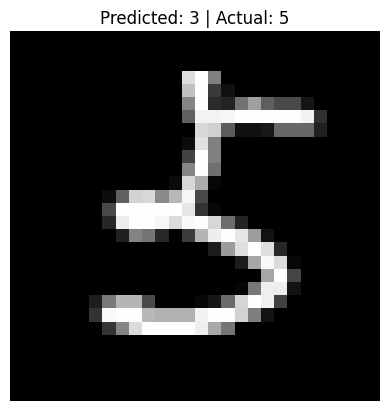

In [142]:
test_prediction(39, X_dev, Y_dev, w1, b1, w2, b2)